In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Formula: y=mx+b
m = 2
b = 0.5
x = np.linspace(0, 4, 100)
y = m * x + b + np.random.randn(*x.shape) + 0.25

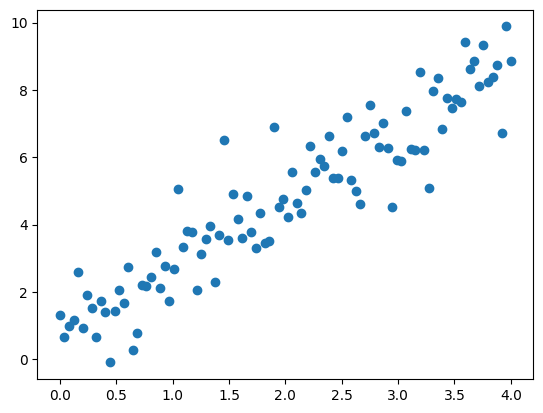

In [12]:
# scatter function in matplotlib draws the datapoints on a graph
plt.scatter(x, y)

In [13]:
class Model:
    def __init__(self): # Unlike regular initializations, 0.0 may result in dead results
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
        
    def __call__(self, x):
        return self.weight * x + self.bias

In [14]:
def calculate_loss(y_actual, y_output):
    return tf.reduce_mean(tf.square(y_actual - y_output))

In [15]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_output = model(x)
        loss = calculate_loss(y, y_output)
        
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(learning_rate * new_weight)
    model.bias.assign_sub(learning_rate * new_bias)

In [17]:
# The training loop

model = Model()
epochs = 100
learning_rate = 0.15

for epoch in range(epochs):
    y_output = model(x)
    loss = calculate_loss(y, y_output)
    print(f"Epoch: {epoch}, Loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Epoch: 0, Loss: 723.9437255859375
Epoch: 1, Loss: 514.1583862304688
Epoch: 2, Loss: 365.41949462890625
Epoch: 3, Loss: 259.9388122558594
Epoch: 4, Loss: 185.11434936523438
Epoch: 5, Loss: 132.0181427001953
Epoch: 6, Loss: 94.3246078491211
Epoch: 7, Loss: 67.55169677734375
Epoch: 8, Loss: 48.52348327636719
Epoch: 9, Loss: 34.98916244506836
Epoch: 10, Loss: 25.35344886779785
Epoch: 11, Loss: 18.485441207885742
Epoch: 12, Loss: 13.583337783813477
Epoch: 13, Loss: 10.078493118286133
Epoch: 14, Loss: 7.567531108856201
Epoch: 15, Loss: 5.764194488525391
Epoch: 16, Loss: 4.465255260467529
Epoch: 17, Loss: 3.5263631343841553
Epoch: 18, Loss: 2.844914436340332
Epoch: 19, Loss: 2.3479244709014893
Epoch: 20, Loss: 1.9834272861480713
Epoch: 21, Loss: 1.7143787145614624
Epoch: 22, Loss: 1.5143332481384277
Epoch: 23, Loss: 1.3643819093704224
Epoch: 24, Loss: 1.250973105430603
Epoch: 25, Loss: 1.1643726825714111
Epoch: 26, Loss: 1.097567081451416
Epoch: 27, Loss: 1.0454844236373901
Epoch: 28, Loss: 1

In [18]:
# Testing & Evaluation

print(model.weight.numpy())
print(model.bias.numpy())

1.9833404
0.8202132


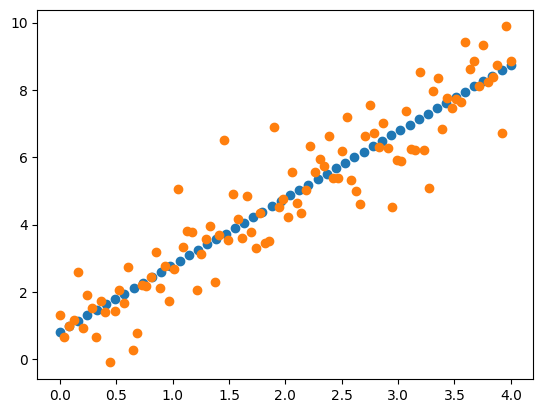

In [20]:
# Testing with the new data
new_x = np.linspace(0, 4, 50)
new_y = model.weight.numpy() * new_x + model.bias.numpy()
plt.scatter(new_x, new_y)
plt.scatter(x, y)